In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from help_plot import plot_decision_regions

# AdaBoost

In [2]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

* Poniższy wykres pokazuje granice decyzyjne pięciu kolejnych predyktorów (w tym przykładzie każdy predyktor jest klasyfikatorem SVM z jądrem RBF). 

* Pierwszy klasyfikator błędnie odczytuje wiele instancji, więc ich wagi zostają wzmocnione. 
* Drugi klasyfikator wykonuje więc lepszą pracę w tych instancjach i tak dalej. 
* Wykres po prawej reprezentuje tę samą sekwencję predyktorów, z wyjątkiem tego, że szybkość uczenia się jest zmniejszana o połowę (to jest, błędne klasy wagi instancji są zwiększane o połowę w każdej iteracji). 
* Jak widać, ta sekwencyjna technika uczenia się ma pewne podobieństwo do Gradient Descent, z tą różnicą, że zamiast ulepszać parametry jednego predyktora, aby zminimalizować funkcję kosztu, AdaBoost dodaje predyktory do komitetu, stopniowo go poprawiając.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

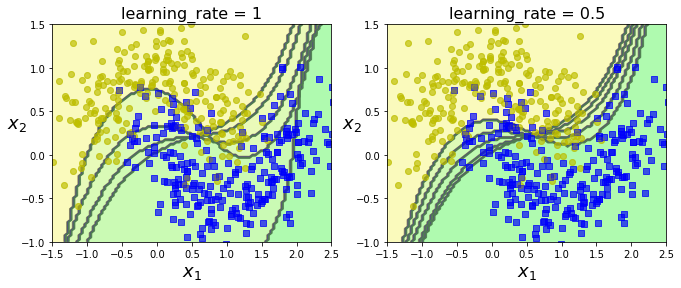

In [24]:
from sklearn.svm import SVC

m = len(X_train)

plt.figure(figsize=(11, 4))
for subplot, learning_rate in ((121, 1), (122, 0.5)):
    sample_weights = np.ones(m)
    plt.subplot(subplot)
    for i in range(5):
        svm_clf = SVC(kernel="rbf", C=0.05, random_state=42)
        svm_clf.fit(X_train, y_train, sample_weight=sample_weights)
        y_pred = svm_clf.predict(X_train)
        sample_weights[y_pred != y_train] *= (1 + learning_rate)
        plot_decision_boundary(svm_clf, X, y, alpha=0.2)
        plt.title("learning_rate = {}".format(learning_rate), fontsize=16)


plt.show()

In [15]:
# from sklearn.ensemble import GradientBoostingRegressor
# from sklearn.ensemble import GradientBoostingClassifier